# Homework 02

Group's members:
- Crnigoj Gabriele 134176
- Ferraro Tommaso 132998
- Stinat Kevin 134905

<font color='red'>**NOTE:**</font> We put comments every step we do. At the end of the Notebook, it can be found the conclusions.

## Classification 

For this task we will use the US Census dataset, which is available from the UCI Machine Learning repository. 

In particular, the training dataset is contained in the file http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) in CSV-like form, without any header information. 

The columns can be set according to the following names:

```
[
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
```

The `fnlwgt` column should be ignored as it is not relevant for the analysis. You will notice that a question mark `?` is used when data is missing.

The classification target will be to predict whether the `Income` attribute will be greater than (or equal to) or less than 50K US$ based on the other demo- and socio-graphic attributes.

### EXERCISE 1

Load the dataset into a pandas `dataframe`, set the column names, drop the `fnlwgt` attribute (recall the `drop()` dataframe method) and inspect the data. In particular, check the nature (categorical, numerical, etc.) of each column, the range of values (use the `describe()` method) or the unique values (using the `unique()` method on each categorical data column).

In [3]:
import numpy as np
import pandas as pd
import colorama
from colorama import Fore, Style

<font color='red'>**Comment:**</font> For the first step, we load the Database from the URL and then we prepare the data for the next analysis. We make a dataframe from the data and we manage them to a better form.

In [4]:
names = ["Age", "WorkClass", "fnlwgt", "Education","EducationNum","MaritalStatus", "Occupation", "Relationship",\
          "Race", "Gender","CapitalGain", "CapitalLoss", "HoursPerWeek","NativeCountry", "Income"]

In [5]:
adultdf = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [6]:
adultdf.columns = names

In [7]:
adultdf = adultdf.drop('fnlwgt', axis = 1) 

In [8]:
adultdf.head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adultdf.shape

(32561, 14)

<font color='red'>**Comment:**</font> As we expected, the columns 'Age', 'EducationNum', 'CapitalGain', 'CapitalLoss' and 'HoursPerWeek' have numerical nature. using the `.describe()` function we get some more information about the data. However some informations are not meaningful.

In [10]:
adultdf.describe()

,Age,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


 <font color='red'>**Comment:**</font> Having known the nature of some data cointained in the previous columns, eith the function `filter` we are selecting all the categorical columns. We show the categorical attributes and their unique values below with `.unique()` function. We also notice that there are some strange symbols (`?`) that we will manage in the next steps.

In [11]:
categorical = list(filter(lambda x: x not in ['Age', 'EducationNum', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek'], 
                          adultdf.columns))

In [12]:
#We print in a better way
print(Fore.BLUE + 'Categorical attributes and its unique values:')
print(Style.RESET_ALL)

for i in categorical:
    print(i,':', ', '.join(adultdf[i].unique()), '\n')

Categorical attributes and its unique values:

WorkClass :  State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  ?,  Self-emp-inc,  Without-pay,  Never-worked 

Education :  Bachelors,  HS-grad,  11th,  Masters,  9th,  Some-college,  Assoc-acdm,  Assoc-voc,  7th-8th,  Doctorate,  Prof-school,  5th-6th,  10th,  1st-4th,  Preschool,  12th 

MaritalStatus :  Never-married,  Married-civ-spouse,  Divorced,  Married-spouse-absent,  Separated,  Married-AF-spouse,  Widowed 

Occupation :  Adm-clerical,  Exec-managerial,  Handlers-cleaners,  Prof-specialty,  Other-service,  Sales,  Craft-repair,  Transport-moving,  Farming-fishing,  Machine-op-inspct,  Tech-support,  ?,  Protective-serv,  Armed-Forces,  Priv-house-serv 

Relationship :  Not-in-family,  Husband,  Wife,  Own-child,  Unmarried,  Other-relative 

Race :  White,  Black,  Asian-Pac-Islander,  Amer-Indian-Eskimo,  Other 

Gender :  Male,  Female 

NativeCountry :  United-States,  Cuba,  Jamaica,  India,  ?,  Mexico,  Sou

<font color='red'>**Comment:**</font> We analized the Dataframe that we obtained with `.dtypes` and allow us to confirm the previous analysis.

In [13]:
adultdf.dtypes

Age               int64
WorkClass        object
Education        object
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
NativeCountry    object
Income           object
dtype: object

### EXERCISE 2: Cleaning

You might notice that the strings for categorical variables are not normalized and leading and trailing spaces might be present, moreover the `?` might appear in the data, indicating a missing information. Normalize strings by applying the `strip()` method on the string representation and impute `np.nan` in place of the `?`.

<font color='red'>**Comment:**</font> As explained into the exercise above, we manage to normalize, clean and show step by step our work. 

In [14]:
for i in categorical:
    adultdf[i] = adultdf[i].str.strip()

In [15]:
adultdf.head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
adultdf.tail()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [17]:
for i in adultdf.columns:
    adultdf[i] = adultdf[i].apply(lambda x:  x if x != '?' else np.nan )

<font color='red'>**Comment:**</font> With this function i can find out the items which are NaN

In [18]:
adultdf.isna().head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<font color='red'>**Comment:**</font> This is an other way to be sure that what we have done is correct 

In [19]:
counter = 0 

for i in adultdf.columns:
    for j in adultdf.index:
        if adultdf[i][j] == '?':
            counter += 1

if counter == 0:
    print(Fore.GREEN + 'Have been found', counter, "'?'")
else :
    print(Fore.RED + 'Have been found', counter, "'?'")
    
print(Style.RESET_ALL)

Have been found 0 '?'



### EXERCISE 3: Check the balancing of the classification attribute

Verify how the different class values of the `Income` variable values are distributed (i.e., what's the percentage of "<=50K" and ">50K" with respect to the total size of the dataset.

You might also plot the balancing by means of a seaborn `sns.countplot(x="Attribute", data=df)`.

<font color='red'>**Comment:**</font> For this porpouse we find out both the frequency and the percentage to show the different classes of the `Income` variable values are distributed. We can see very clearly that most of the people (about 75%) earn less that 50K dollars.

In [20]:
import seaborn as sns

In [21]:
print(Fore.BLUE + 'Frequency:')
print(Style.RESET_ALL)

frequency = pd.DataFrame(adultdf['Income'].value_counts())
frequency

Frequency:



,Income
<=50K,24720
>50K,7841


In [22]:
percentage = pd.DataFrame(frequency / len(adultdf.index)  )

print(Fore.BLUE + 'Percentage:')
print(Style.RESET_ALL)

percentage

Percentage:



,Income
<=50K,0.75919
>50K,0.24081


<font color='red'>**Comment:**</font> We plot the data because you can clearly see the difference between the two columns of the histogram.

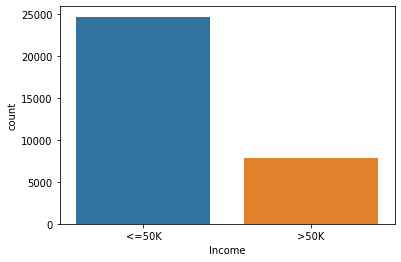

In [23]:
sns.countplot(x = 'Income', data = adultdf)

<font color='red'>**Comment:**</font> Now we've plotted how the incomes are divided in this dataframe

### EXERCISE 4: Plotting Categorical Attributes

To look at the balance/discriminative effect of the different categorical attributes among the predicted attribute, use the seaborn `sns.countplot(y=attribute, hue='Income', data=df)` function to plot some bars of the different counts of the categorical attributes. The use of `Income` for the hue, will divide the plot for the two classification values.

**Note**: you can put the plot creation in a `for` loop that iterates along all categorical attribute names. In that case, in order to create a new picture for each attribute you must call `plt.figure()` (where `plt` is `matplotlib.pyplot`, imported as usual) to create a new figure.

You will notice that, in a coarse grain view, there is no clear balance among the different attributes, so all of them could be profitably used for classification purpose.

In [24]:
import matplotlib.pyplot as plt

<font color='red'>**Comment:**</font> For each categorical attribute we have plot how the Income is splitted for each attribute. We can see how there is no clear balance between the different attributes, but we take some considerations abaout the single couple (attribute, 'Income'):

`WorkClass:` \
For example by analyzing the graph we can see that the nature of the data is correct in fact in the `workclass`, for `without pay` and `never worked` the `income` is equal to 0 and there aren't outliers. We can notice that most of the people that are into the datase belongs to teh `private` sector.

`Education:` \
Furthermore, we can see how an higher level of education leads us to expect an `income` of more than 50k and for those who stop at lower level of education, the income lower than 50k is more frequent. We observe evidence of this in our data, especially for those who attended to Masters, Prof-Schools and Doctorate.

`MaritalStatus` , `Occupation` and `Relationship:` \
IIn all of the those attributes, We see cleary that most people earns less than 50k dollars. We can see also some particular cases: for example, as the common sense say, we see that `Married-civ-Spouse`, `Executive Managerial`, `prof- speciality` and `Husband` earns more than the other categories.

`Race:` \
We can see very clearly that in proportion that 'White' people are many more and they areans more that other 'races'.

`Gender:` \
An important valutation could be made by analyzing the `gender` plot in fact there are more men who earn more than 50k compared to women.

`Native country:` \
As we can see from the `native country` plot most of the people analyzed in this database are from the United States and this must be taken into account in the conclusions.

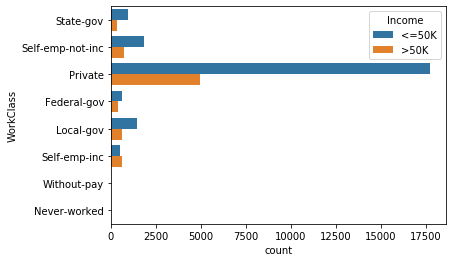

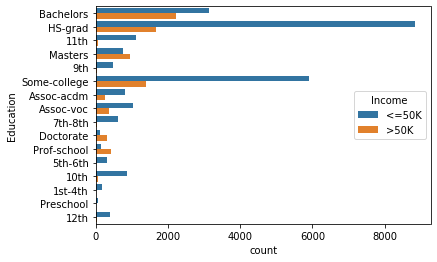

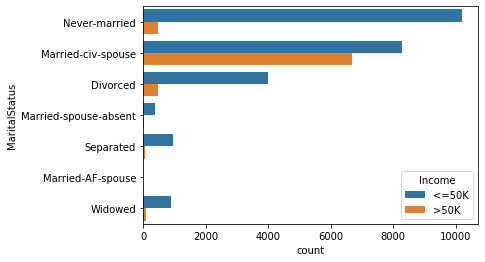

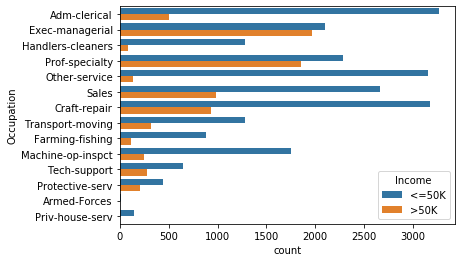

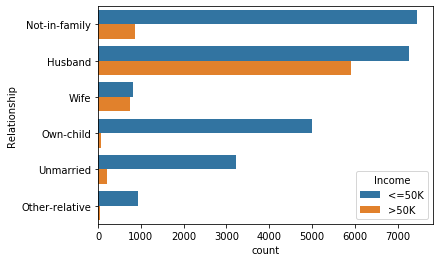

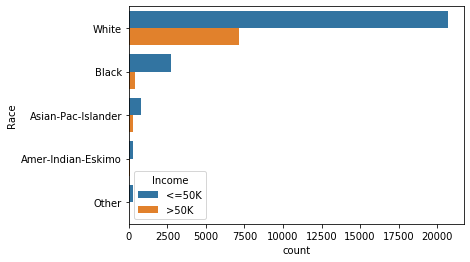

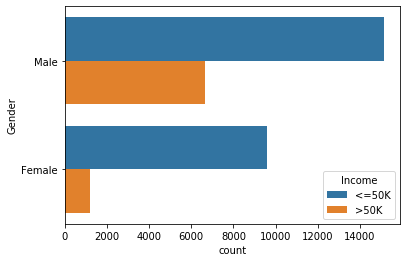

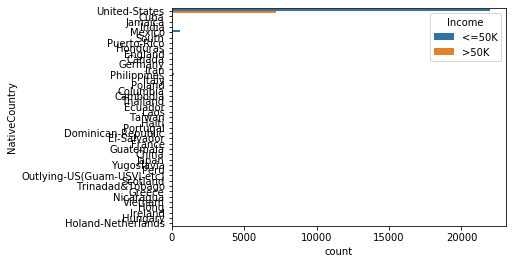

In [25]:
for i in list(filter(lambda x: x != 'Income', categorical)):
    plt.figure()
    sns.countplot(y = i, hue = 'Income', data = adultdf)

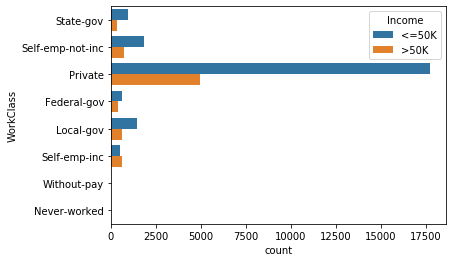

In [26]:
sns.countplot(y = 'WorkClass', hue = 'Income', data = adultdf)

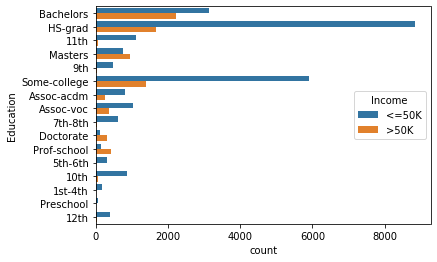

In [27]:
sns.countplot(y = 'Education', hue = 'Income', data = adultdf)

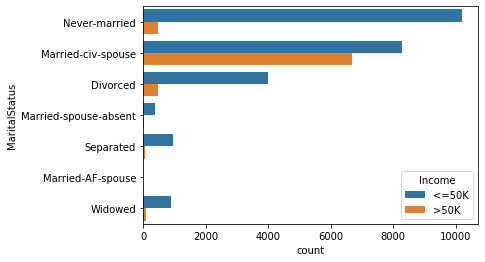

In [28]:
sns.countplot(y = 'MaritalStatus', hue = 'Income', data = adultdf)

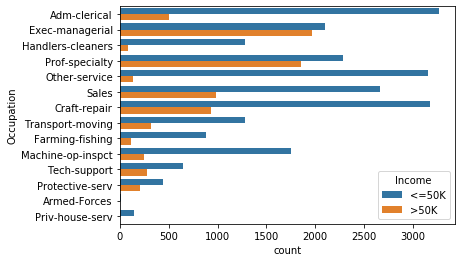

In [29]:
sns.countplot(y = 'Occupation', hue = 'Income', data = adultdf)

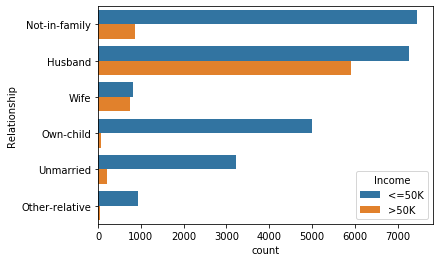

In [30]:
sns.countplot(y = 'Relationship', hue = 'Income', data = adultdf)

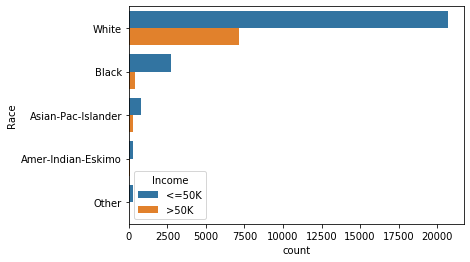

In [31]:
sns.countplot(y = 'Race', hue = 'Income', data = adultdf)

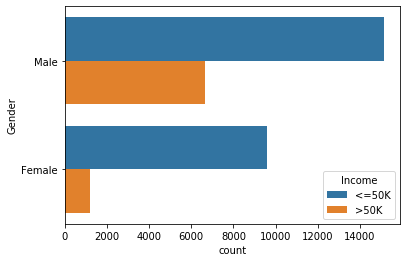

In [32]:
sns.countplot(y = 'Gender', hue = 'Income', data = adultdf)

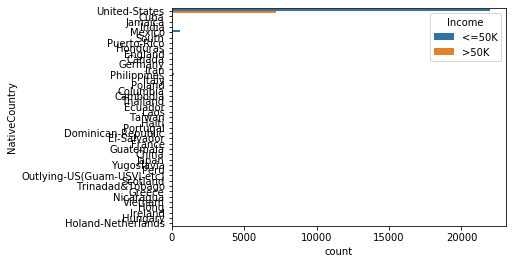

In [33]:
sns.countplot(y = 'NativeCountry', hue = 'Income', data = adultdf)

### EXERCISE 5: Plotting Numerical Attributes

To look at the balance/discriminative effect of the numerical attributes among the predicted attribute, you can use the seaborn `distplot(series, color='blue')` function to plot the histogram and the distribution of values of a time series. The use of `color` either `blue` or `orange` will create the plot for the two classification values.

Differently from the previous case, you should explicitly filter the dataset and the attribute, that is `distplot(df[df["Income"] == ">50K"][attribute], color = "orange")` is the way the function must be called. Furthermore, you can add a legend this way `plt.legend(("<=50K", ">50K"))`.

You will notice that, in a coarse grain view, there is no clear overlapping distributions among the different attributes, so all of them could be profitably used for classification purpose.

<font color='red'>**Comment:**</font> Below we have plot the difference between the numerical attribute for the `Income`. we can deduce more or less the same conclusion by analyzing the plot (and the distribuition of the values):

`EducationNum:`
We arrive at the same conclusione of the previous analysis because the data (categorical befor, numerical here) have the same meaning (the more pleople had studied, the more they earn.

`Capital Gain ` and `Capital Loss:` 
From this plot, we can't distinguish very clear the output, so the conclusions are meaningless.We can notice that the most peoplo never gain or lost their capital.

`HoursPerWeek:`
Futhermore we can see that the majority of people who have an income <=50k works about 40 hours per week, and instead we can see that many people who earn more than >50k works more than 40 hours a week, from 50 to 60 hours per week.

`Age:`
We can see how the average age of people who have an income higher than 50k is greater than the others, in partcular younger people (20 to 30 years old) earn less than 50k of dollars, instead of older people (40 to 60) that earn more than 50k of dollars. 

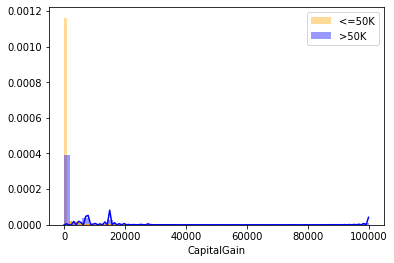

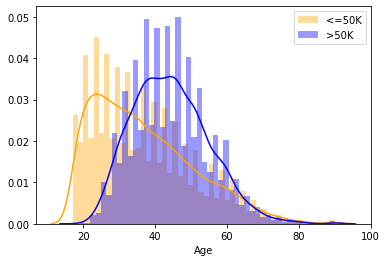

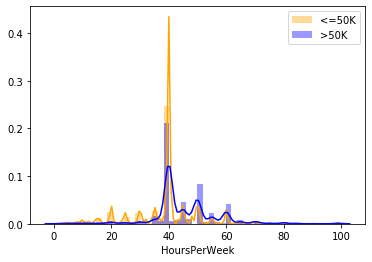

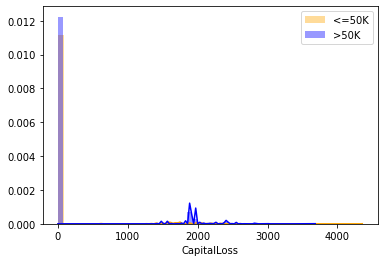

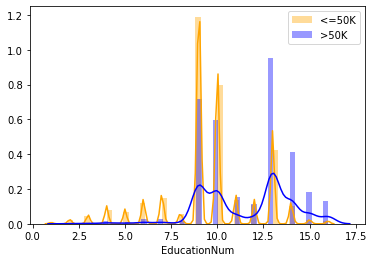

In [34]:
for attribute in set(adultdf.columns) - set(categorical):
    plt.figure()
    sns.distplot(adultdf[adultdf["Income"] == "<=50K"][attribute], color = 'orange')
    sns.distplot(adultdf[adultdf["Income"] == ">50K"][attribute], color = 'blue')
    plt.legend(("<=50K", ">50K"))

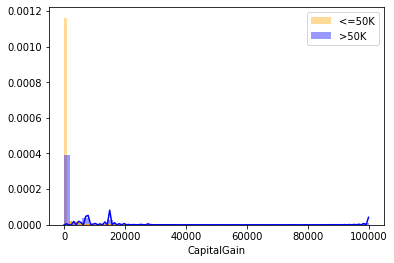

In [35]:
plt.figure()
sns.distplot(adultdf[adultdf["Income"] == "<=50K"]['CapitalGain'], color = 'orange')
sns.distplot(adultdf[adultdf["Income"] == ">50K"]['CapitalGain'], color = 'blue')
plt.legend(("<=50K", ">50K"))

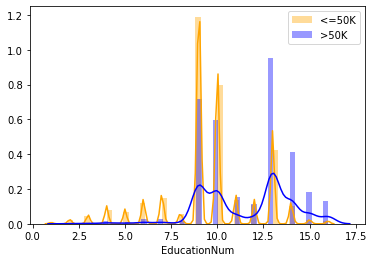

In [36]:
plt.figure()
sns.distplot(adultdf[adultdf["Income"] == "<=50K"]['EducationNum'], color = 'orange')
sns.distplot(adultdf[adultdf["Income"] == ">50K"]['EducationNum'], color = 'blue')
plt.legend(("<=50K", ">50K"))

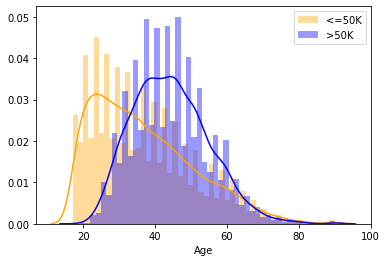

In [37]:
plt.figure()
sns.distplot(adultdf[adultdf["Income"] == "<=50K"]['Age'], color = 'orange')
sns.distplot(adultdf[adultdf["Income"] == ">50K"]['Age'], color = 'blue')
plt.legend(("<=50K", ">50K"))

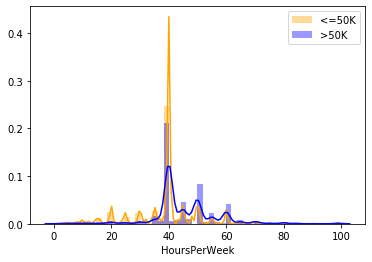

In [38]:
plt.figure()
sns.distplot(adultdf[adultdf["Income"] == "<=50K"]['HoursPerWeek'], color = 'orange')
sns.distplot(adultdf[adultdf["Income"] == ">50K"]['HoursPerWeek'], color = 'blue')
plt.legend(("<=50K", ">50K"))

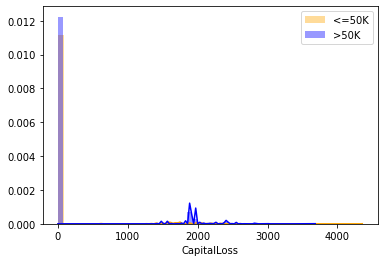

In [39]:
plt.figure()
sns.distplot(adultdf[adultdf["Income"] == "<=50K"]['CapitalLoss'], color = 'orange')
sns.distplot(adultdf[adultdf["Income"] == ">50K"]['CapitalLoss'], color = 'blue')
plt.legend(("<=50K", ">50K"))

### EXERCISE 6: Computing Gini Index for Categorical Attribute Values

The following function will compute the Gini-index for all values of a possible categorical attribute, with respect to the classification attribute `c_attribute`.

```
def gini(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    _df_agg = (_df.groupby([attribute, c_attribute]).size() / _df.groupby(attribute).size()) ** 2
    _df_agg = _df_agg.reset_index().groupby(attribute).apply(lambda s: 1.0 - sum(s[0]))
    _df_agg.loc['Overall'] =  (_df_agg * (_df.groupby('Income').size() / _df.shape[0])).sum()
    return _df_agg
    
```

Compare the pictures with the value counts with the computation of the Gini index and look at those attributes that have a higher discriminative power (the lower the Gini value, the higher the discriminative power).

<font color='red'>**Comment:**</font>  First of all, we find out the lenght of the dataframe's vector that we need for saving the Gini Index of each attributes. It was possible to print the Gini Index without saving them into a vector, but in this way, we can call it again in the next steps of the analysis if is it required.

In [40]:
c = 0
for attribute in set(categorical) - set(["Income"]):
    c += 1
print('There are', c, 'attributes')

There are 8 attributes


In [41]:
def gini(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    _df_agg = (_df.groupby([attribute, c_attribute]).size() / _df.groupby(attribute).size()) ** 2
    _df_agg = _df_agg.reset_index().groupby(attribute).apply(lambda s: 1.0 - sum(s[0]))
    _df_agg.loc['Overall'] =  (_df_agg * (_df.groupby('Income').size() / _df.shape[0])).sum()
    return _df_agg

In [42]:
vector_df = ['ginidf1','ginidf2', 'ginidf3', 'ginidf4', 'ginidf5', 'ginidf6', 'ginidf7', 'ginidf8']

for index, attribute in enumerate(set(categorical) - set(["Income"])):  
        vector_df[index] = pd.DataFrame(gini(adultdf, attribute, "Income"), columns = ['Gini Index'])

In [43]:
print(Fore.BLUE + 'Gini Index:')
print(Style.RESET_ALL)

for i in range(len(vector_df)):
    print(vector_df[i], '\n\n')

Gini Index:

                            Gini Index
NativeCountry                         
Cambodia                      0.465374
Canada                        0.436855
China                         0.391111
Columbia                      0.065498
Cuba                          0.387812
Dominican-Republic            0.055510
Ecuador                       0.244898
El-Salvador                   0.155393
England                       0.444444
France                        0.485137
Germany                       0.436038
Greece                        0.399524
Guatemala                     0.089355
Haiti                         0.165289
Holand-Netherlands            0.000000
Honduras                      0.142012
Hong                          0.420000
Hungary                       0.355030
India                         0.480000
Iran                          0.486750
Ireland                       0.329861
Italy                         0.450366
Jamaica                       0.216430
Japan       

In [44]:
vector_df[0]

,Gini Index
NativeCountry,
Cambodia,0.465374
Canada,0.436855
China,0.391111
Columbia,0.065498
Cuba,0.387812
Dominican-Republic,0.055510
Ecuador,0.244898
El-Salvador,0.155393
England,0.444444


<font color='red'>**Comment:**</font> `NativeCountry:` the only one Gini Index value that have a significant value is the one optained from the United States because in the other other counties there are to few peolple and the Gini Index is unbalanced.
Into the United State we find that the earnings are neighter equally distribuited nor disequally distribuited, but We find confirmation on the results obtained thanks to the plot of exercise 4 that more people aren less than >=50k of dollas.

In [45]:
vector_df[1]

,Gini Index
Race,
Amer-Indian-Eskimo,0.204713
Asian-Pac-Islander,0.390151
Black,0.217067
Other,0.167481
White,0.380791
Overall,0.000000


<font color='red'>**Comment:**</font>  `Race:` We can see that 'white' people have more equilly distribuited, instead of the other 'races' that have a lower Gini Index value. Those values shows that there is a inequality of distribuition of wealth. From the graphs that we plot during the exercise 4, we can see very clear why `Asian-Pac-Islander` have an higher Gini Index, but those conclusions are derivabled for all the categories.

In [46]:
vector_df[2]

,Gini Index
Occupation,
Adm-clerical,0.232794
Armed-Forces,0.197531
Craft-repair,0.350549
Exec-managerial,0.499489
Farming-fishing,0.204618
Handlers-cleaners,0.117666
Machine-op-inspct,0.218563
Other-service,0.079699
Priv-house-serv,0.013333


<font color='red'>**Comment:**</font> `Occupation:` we obtain the same results from `Education` attribute because they are related. We find confirmation on the results obtained thanks to the plot of exercise 4

In [47]:
vector_df[3]

,Gini Index
MaritalStatus,
Divorced,0.186699
Married-AF-spouse,0.491493
Married-civ-spouse,0.494350
Married-spouse-absent,0.149447
Never-married,0.087697
Separated,0.120488
Widowed,0.156544
Overall,0.000000


<font color='red'>**Comment:**</font> `MaritalStatus:` we found out the same result of the Gini Index appplied to the attribute `Relationship`, We find confirmation on the results obtained thanks to the plot of exercise 4, above all the `Married-civ-spouse` value, because the histograms have circa the same areas and lenght.

In [48]:
vector_df[4]

,Gini Index
Gender,
Female,0.194958
Male,0.424523
Overall,0.000000


<font color='red'>**Comment:**</font> `Gender:` we can see very cleare the more inequality between the `Female` that the `Male` categories, We find confirmation on the results obtained thanks to the plot of exercise 4.

In [49]:
vector_df[5]

,Gini Index
Education,
10th,0.124073
11th,0.096913
12th,0.140808
1st-4th,0.068878
5th-6th,0.091479
7th-8th,0.116171
9th,0.099540
Assoc-acdm,0.373355
Assoc-voc,0.385964


<font color='red'>**Comment:**</font> `Education:` we obtain a very meaningful information: the higher is the level of the education, the more equally is distribuited the earning between people that belongs to that education level, We find confirmation on the results obtained thanks to the plot of exercise 4


In [50]:
vector_df[6]

,Gini Index
Relationship,
Husband,0.494710
Not-in-family,0.184894
Other-relative,0.072588
Own-child,0.026091
Unmarried,0.118519
Wife,0.498763
Overall,0.000000


<font color='red'>**Comment:**</font> `Relationship:` from the Gini Index applied to this attribute, wee don't obtain meaningful informations: for example, the sub-attributes are too much splitted and show us a false inequality.
We can notice that people that are merried (`Husband` and `Wife`) have more equal distribution of earnings. As we said before, from the plotting into the exercise 4 (areas of the histograms) we can see the number of the components of each categories divided by how they earn.

In [51]:
vector_df[7]

,Gini Index
WorkClass,
Federal-gov,0.474217
Local-gov,0.415779
Never-worked,0.000000
Private,0.341710
Self-emp-inc,0.493422
Self-emp-not-inc,0.407487
State-gov,0.395993
Without-pay,0.000000
Overall,0.000000


<font color='red'>**Comment:**</font>  `WorkClass:` We notice that workers that belong to `-gov` employment have more distribuited earnings (Gini Value very similar to 0.5), On the countrary there is more inequality between employees that belongs to the private sector. in the end, as we expected, we find out that people `Without-pay` and `Never-worked` have null Gini value. The meaning is that they do not have earnings. We find confirmation on the results obtained thanks to the plot of exercise 4, above all into the `Self-emp-inc` value that is similar to 0.5.

  <font color='red'>**Comment:**</font> We notice the `Overall` of all the Gini Index is equal to zero (is not zero, but a very little number). This rappresent that there is a very evident disequality between the categoriaes of each attribute, and We find confirmation on the results obtained thanks to the plot of exercise 4.

### EXERCISE 7: Computing and Inspecting Fisher Score for Numerical Attributes

The following function will compute the Fisher-score for a possible numerical attribute, with respect to the classification attribute `c_attribute`.

```
def fisher(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    g = _df.groupby(c_attribute)
    p = g.size() / _df.shape[0]
    return sum(p * (g[attribute].mean() - _df[attribute].mean()) ** 2) / sum(p * g[attribute].var()) 
```

Compare the pictures with the value counts with the computation of the Fisher score and look at those attributes that have a higher discriminative power (the higher the Fisher score, the higher the discriminative power).

In [50]:
def fisher(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    g = _df.groupby(c_attribute)
    p = g.size() / _df.shape[0]
    return sum(p * (g[attribute].mean() - _df[attribute].mean()) ** 2) / sum(p * g[attribute].var())

In [51]:
dict_fisher = {}

for attribute in set(adultdf.columns) - set(categorical) - set(['Income']):
    dict_fisher.update({attribute : fisher(adultdf, attribute, 'Income')})

In [52]:
df_fisher = pd.DataFrame(list(dict_fisher.items()), columns = ['Attribute', 'Fisher'])
df_fisher = df_fisher.set_index('Attribute')

print(Fore.BLUE + 'Fisher Score:')
print(Style.RESET_ALL)
df_fisher

Fisher Score:



,Fisher
Attribute,
HoursPerWeek,0.055692
CapitalGain,0.052487
Age,0.057944
EducationNum,0.126535
CapitalLoss,0.023181


<font color='red'>**Comment:**</font> After calculating the Fisher score for each Numerical Attribute and analyzing these data with the diagrams of exercise 5 we notecied that the attributes that present a greater value also have a greater discriminative power since in fact their graph is characterized by numerous peaks.
Otherwise the other attributes has less peaks because the data are enclosed in few values.

### EXERCISE 8: Feature Engineering

Some of the categorical features have some values that are a bit too detailed and not so informative. For example, marital status as the following categories 
```
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
 ```
and some of them could be collapsed, e.g., the different `Married` variants, the `Never-married` and the different kind of no-more married (`Divorced/Separated/Widowed`).

Create a new column `Married` in the dataframe encoding these new values by converting from the original `MaritalStatus`.

Then, compare the Gini index of the new attribute values with the values of the `MaritalStatus`, are they more discriminative than the previous ones?

In [53]:
adultdf['Married'] = adultdf['MaritalStatus'].map(lambda s: "Married" if s.startswith("Married") 
                                                  else s if s.startswith("Never") else "Divorced/Separated/Widowed")

In [54]:
dfmarried_income = pd.DataFrame(gini(adultdf, 'Married', 'Income'), columns = ['Gini Index'])
dfmarried_income

,Gini Index
Married,
Divorced/Separated/Widowed,0.172001
Married,0.492042
Never-married,0.087697
Overall,0.000000


In [55]:
dfmaritalstatus_income = pd.DataFrame(gini(adultdf, 'MaritalStatus', 'Income'), columns = ['Gini Index'])
dfmaritalstatus_income

,Gini Index
MaritalStatus,
Divorced,0.186699
Married-AF-spouse,0.491493
Married-civ-spouse,0.494350
Married-spouse-absent,0.149447
Never-married,0.087697
Separated,0.120488
Widowed,0.156544
Overall,0.000000


<font color='red'>**Comment:**</font> After condensing the values and dividing them into `Married` `Never-Merried` & the different kind of `no-more married` we can see how the gini index of `married` people has remained basically unchanged as that of `never-merried` people, while the value of the remaining people is the average of the previous values but still remains close enough to the initial values of each of those categories. The condensation of values can therefore be considered effective for the purposes of our analysis

## Data transformation

Unfortunately, pandas dataframes, when categorical variables are present, cannot directly be managed by `scikit-learn` because the library expects to deal with numerical values only (possibly encoding the categorical variables). However, the library makes available a set of *encoders*, that is, utility functions for encoding and decoding from/to categorical content. Furthermore, `scikit-learn` features a number of other data transformations (one of those has been already used, i.e., the `TfIdfVectorizer`) including functions for imputing missing values (imputers) and scaling/normalizing numerical values.

Data transformation from pandas to the `scikit-learn` analysis could be profitably organized in terms of *pipelines*, whose components are nothing but some data transformation/learning classes that will deal with a composite analysis task. More detail on that later.

A handful library for customizing the transformations to be applied to pandas dataframe is `sklearn-pandas`. If it has not been already installed you might install it by means of the command\
\
`
    !pip3 install sklearn-pandas
`
\
\
The library provides the `DataFrameMapper` function, which defines a set of transformations to be applied to a dataframe in order to obtain a `numpy` array suitable for processing with `scikit-learn`.

In [56]:
pip install sklearn-pandas


The following command must be run outside of the IPython shell:

    $ pip install sklearn-pandas

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


### Exercise 9: basic data transformation, encoding categories

The most common way to encode categorical (non-ordinal) data is by means of the, so-called, *one-hot* or *dummies* encoder. For example, if the categorical data has three categories, `Red`, `Yellow`, and `Orange`, a single value can be encoded by a triple of `0-1` values, one for each category, and the value is `1` only for the specific encoded category. That is, `Red` might be `[1, 0, 0]`, `Yellow` `[0, 1, 0]`, and `Orange`, `[0, 0, 1]`.

In `scikit-learn`, the encoders are available in the `sklearn.preprocessing` package, and in particular this categorical encoding is available from the `OneHotEncoder` class.

The usage of `scikit-learn` classes follows the same pattern we already seen:

1. create the suitable `scikit-learn` object by instantiating the class and passing the relevant parameters;
2. *“train”* the object passing to the `fit()` method the data that has to be manipulated or used for training;
3. *“use“* the object for transformation by calling the `transform()` method on the data (either on the test, if the object is a model or the very same data used for fitting if it is a transformation object).

Recall that, in case you are dealing with transformation objects (such as those used in preprocessing) you can collapse phases 2 and 3 into a single one by calling the `fit_transform()` method just once.

In this exercise you are required to test the capabilities of the `OneHotEncoder` class.

Notice that you can provide multiple columns to the `fit()` or `fit_transform()` method, in such a case you will get a (different) encoding for each single attribute.

See what's happening when you try to encode the `MaritalStatus` and `Gender` attributes (both with the same `OneHotEncoder` object). Only for this exercise, it might be useful, when you create the `OneHotEncoder` object to pass the parameter `sparse=False` to get a *readable* output (if you don't do this you will get a sparse matrix, which efficiently stores the `0-1` structure by memorizing only the ones and their coordinates).

In order to check the mapping between categories and the positions in the encoded array you can inspect the `.categories_` field of the encoding object.

Try also to use the `.inverse_transform()` method of the encoding object to get the inverse mapping from the encoding array into the original categories. For example, you might try with `[0., 0., 0., 0., 1., 0., 0., 0., 1.]` and check the result.
Notice that you will have to embed the encoding into a list to get the results (i.e., `[[0., 0., 0., 0., 1., 0., 0., 0., 1.]]`).

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
OneHotEncoder_obj = OneHotEncoder(sparse = False)
OneHotEncoder_obj.fit_transform(adultdf[['MaritalStatus', 'Gender']])

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [59]:
OneHotEncoder_obj

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [60]:
type(OneHotEncoder_obj)

sklearn.preprocessing._encoders.OneHotEncoder

In [61]:
OneHotEncoder_obj.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object), array(['Female', 'Male'], dtype=object)]

In [62]:
categories_list = []

for i in OneHotEncoder_obj.categories_:
    for k in i:
        categories_list.append(k)
    
print('Categories of OneHotEncoder_obj are:',', '.join(categories_list))

Categories of OneHotEncoder_obj are: Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, Widowed, Female, Male


In [63]:
df_OneHotEncoder = pd.DataFrame(OneHotEncoder_obj.fit_transform(adultdf[['MaritalStatus', 'Gender']]))
df_OneHotEncoder.columns = categories_list
df_OneHotEncoder.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Female,Male
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
df_OneHotEncoder.tail()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Female,Male
32556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32557,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
OneHotEncoder_obj.inverse_transform([[0., 0., 0., 0., 1., 0., 0., 0., 1.]])

array([['Never-married', 'Male']], dtype=object)

In [66]:
OneHotEncoder_obj.inverse_transform([[1., 0., 0., 0., 0., 0., 0., 1., 0.]])

array([['Divorced', 'Female']], dtype=object)

In [67]:
OneHotEncoder_obj.inverse_transform([[0., 1., 0., 0., 0., 0., 0., 0., 1.]])

array([['Married-AF-spouse', 'Male']], dtype=object)

### EXERCISE 10: Encoding Ordinals

In the dataframe, the `Education` attribute, although categorical, is clearly ordinal and deserves a special treatment. Pandas treatment of ordinal categories requires

The (increasing) order of the values for the `Education` attribute is the following:

```
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters',
 'Doctorate']
```

In order to convert an attribute to a categorical ordinal attribute you can use the `.astype()` method on that specific column of the dataframe. In general `.astype()` can take a string with the new type, when the type is a basic one (like `int`, `bool`, etc.), however for this case we must recode the attribute by fully specifying a new categorical ordinal type. 

The new type can be created by means of the `pd.Categorical()` function, which takes the original values of the attribute (i.e., `df['Education']`) as its first parameter and `categories=['Preschool', ...]` as the specification of the category labels. Moreover, you should provide a `ordered=True` parameter to set it as ordered. The output of this function can be used as a new type in the `.astype()` method to convert the column.

The task of this exercise is to convert the `Education` column into its categorical/ordered form. Ensure that this is really the case, by issuing `df['Education'].head()` and check the output.

In [68]:
categories = ['Preschool', '1st-4th', '5th-6th', '7th-8th','9th', '10th','11th', '12th', \
              'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

adultdf['Education'] = adultdf['Education'].astype(pd.Categorical(adultdf['Education'], categories,ordered=True))

In [69]:
adultdf['Education'].head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: Education, dtype: category
Categories (16, object): [Preschool < 1st-4th < 5th-6th < 7th-8th ... Some-college < Bachelors < Masters < Doctorate]

In [70]:
adultdf['Education'].describe()

count       32561
unique         16
top       HS-grad
freq        10501
Name: Education, dtype: object

In [71]:
adultdf['Education'].dtypes

CategoricalDtype(categories=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
                  '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm',
                  'Assoc-voc', 'Some-college', 'Bachelors', 'Masters',
                  'Doctorate'],
                 ordered=True)

### EXERCISE 11: Basic Data Transformation, `scikit-learn` Encoding of Ordinals

Once the `Education` column is correctly transformed into an ordered attribute, still there is the need to convert it in numerical form in order to be handled by `scikit-learn`. This is the purpose of the `OrdinalEncoder` class (also in the `sklearn.preprocessing` package). This class will transform each category into an integer number comprised between $0$ and $n_{categories} - 1$. For nominal categories the conversion is automatic, however, in order to specify an ordinal you should pass the specific order in the constructor.

The order of the categories of the `Education` attribute can be accessed as `df['Education'].cat.categories` and, possibly, transformed into a list. Similarly to the `HotOneEncoder` the encoder expects to work on multiple columns, therefore you should 
- extract the transformed column as a dataframe and not as a simple series (i.e., using `[['Education']]` as the selector);
- express the `categories` parameter in the `OrdinalEncoder` constructor as a list of lists.

Try to setup an ordinal encoder for the case at hand and test it on the `Education` attribute of the dataframe. If everything is fine you should get the following output (notice that value 13 corresponds to the index of `Bachelor` in the categories).

```
array([[13.],
       [13.],
       [ 8.],
       ...,
       [ 8.],
       [ 8.],
       [ 8.]])
```

**Important Notice** you might encounter an error in using `OrdinalEncoder` if the `scikit-learn` library is older than version `0.20.2`. In such a case, or to prevent such a case, install the newer version by issuing the command \
\
`
!pip install -U scikit-learn
`

In [72]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\gabriele\anaconda3\lib\site-packages (0.22)


In [73]:
from sklearn.preprocessing import OrdinalEncoder

In [74]:
OrdinalEncoder_obj_education = OrdinalEncoder(categories = [list(adultdf['Education'].cat.categories)])

<font color='red'>**Comment:**</font> the class OrdinalEncoder allows to encode categorical features as an integer array. The parameter 'categories' defines the unique values per features (that we find out in the next line of code). We give to it this list with the categories of this categorical (through .cat.categories).

In [75]:
OrdinalEncoder_obj_education

OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'HS-grad', 'Prof-school',
                            'Assoc-acdm', 'Assoc-voc', 'Some-college',
                            'Bachelors', 'Masters', 'Doctorate']],
               dtype=<class 'numpy.float64'>)

<font color='red'>**Comment:**</font> now we want through *OrdinalEncoder* we want to translate all of the previous categories in integers. So, through *fit_trasform* below we:
- **fit** the transformer to adultdf['Education']. It adapts itself to recognize every unique value of Education attribute and then assigns to it its own integer number.

- **transform**, through the model that we've already fitted, every value in the Education column to its corresponding integer value.

At the end we'll have an array with an encoded version of adultdf['Education'].

In [76]:
OrdinalEncoder_obj_education.fit_transform(adultdf[['Education']])

array([[13.],
       [13.],
       [ 8.],
       ...,
       [ 8.],
       [ 8.],
       [ 8.]])

In [77]:
dict_OrdinalEncoder = {}

for position, index in enumerate(OrdinalEncoder_obj_education.fit_transform(adultdf[['Education']])):
    dict_OrdinalEncoder.update({position : list(index)})

In [78]:
df_OrdinalEncoder_obj = pd.DataFrame(list(dict_OrdinalEncoder.items()), columns = ['index', 'OrdinalEncoder_obj'])
df_OrdinalEncoder_obj = df_OrdinalEncoder_obj.set_index('index')

df_OrdinalEncoder_obj.head()

,OrdinalEncoder_obj
index,
0,[13.0]
1,[13.0]
2,[8.0]
3,[6.0]
4,[13.0]


In [79]:
adultdf.Education.head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: Education, dtype: category
Categories (16, object): [Preschool < 1st-4th < 5th-6th < 7th-8th ... Some-college < Bachelors < Masters < Doctorate]

<font color='red'>**Comment:**</font> as we can see 13 coincides with the category 'Bachelor' and 8 to 'HS-grad'. In order to check out what category every number represents, we can use the attribute categories_ of OrdinalEncoder.

In [80]:
df_OrdinalEncoder_obj.tail()

,OrdinalEncoder_obj
index,
32556,[10.0]
32557,[8.0]
32558,[8.0]
32559,[8.0]
32560,[8.0]


## Handling missing values

Unfortunately, classification methods cannot deal with missing values, therefore they need to be properly handled. This is classified as an **hotspot**, which is a design choice that might impact on the analysis and more than a single alternative has to be tested.

First of all, let's check how many missing values are present and on which attributes.

`df.isnull().sum()`

In [81]:
adultdf.isnull().sum()

Age                 0
WorkClass        1836
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     583
Income              0
Married             0
dtype: int64

<font color='red'>**Comment:**</font> there are a lot of missing values in the column *WorkClass, Occupation, NativeCountry* that we have to deal with. In the next step we'll do some actions about it. 

### EXERCISE 12: Impute the Missing Values

Update the dataframe so that the missing values will be assigned to the `Unknown` category.
Do it for any single column.

In [82]:
for attribute in 'Occupation', 'WorkClass', 'NativeCountry':
    adultdf[attribute] = adultdf[attribute].fillna('Unknown')
    
adultdf['NativeCountry'][14]

'Unknown'

<font color='red'>**Comment:**</font> For each category where there are some missing value we fill them with "Unknown". And to be sure of the right execution we check if the value in the line 14 of NativeCountry (which was missing) has changed into "Unknown". We chech the sum of the missing values runnung again the `.isnull().sum()` functions

In [83]:
adultdf.isnull().sum()

Age              0
WorkClass        0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
Married          0
dtype: int64

### EXERCISE 13: Combine Basic Data Transformations with `sklearn-pandas`

Notice that each transformation will just return a subset of the transformed data, in particular you should assemble all the different outputs into a comprehensive matrix in order to be used with the `scikit-learn` classification facilities.

As already mentioned, the `sklearn-pandas` library provides a handful way to combine basic data transformation on a single dataframe in order to get a single assembled output.

The relevant class is `DataFrameMapper` which does the magic. You can refer to https://github.com/scikit-learn-contrib/sklearn-pandas for a detailed documentation.

The purpose of the exercise is to come up with a single transformation that will put together all the different encoding employed.

You can specify a composite transformation by providing to the `DataFrameMapper` constructor a list of tuples, in which the first element is the column (or a list of columns) on which the transformation has to be performed and the second element is the object that will perform the transformation (or a list of objects if multiple subsequent transformations are needed), which might be created *on-the-fly*. 

Notice that only the columns that are listed in the datamapper will be transformed and included in the result. If you want to include a set of non-transformed columns you should provide a tuple with a list of those columns and `None` as the transformation to be applied.

Recall, that if the preprocessing expects a dataframe instead of a series (e.g., the `OrdinalEncoder` used just before) you should express the single column as a list, i.e., `['Education']`.

Finally, in order to be completely general, pass `"ignore"` to the `HotOneEncoder(handle_unknown='ignore')` constructor so that it will silently handle missing categories.

Once a `DataFrameMapper` object is in place, you can call the `fit()` method directly from the created object, whereas the `transform()` method will return the composite transformation.

Call this first `DataFrameMapper` just `encoding`.

Write another `DataFrameMapper` (call it `encoding_target`) just for the target variable `Income`, that applies only a default `OrdinalEncoder` to that variable. 

In [84]:
pip install sklearn-pandas


The following command must be run outside of the IPython shell:

    $ pip install sklearn-pandas

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [85]:
from sklearn_pandas import DataFrameMapper

<font color='red'>**Comment:**</font> DataFrameMapper is a class for mapping pandas data frame columns to different sklearn transformations.

In [86]:
encoding = DataFrameMapper([
    (['Education'], OrdinalEncoder(categories=[list(adultdf['Education'].cat.categories)])),    
    (['MaritalStatus', 'Married', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry', 'WorkClass'], 
     OneHotEncoder(handle_unknown='ignore')),
    (['Age', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek'], None)]) 

encoding

DataFrameMapper(default=False, df_out=False,
                features=[(['Education'],
                           OrdinalEncoder(categories=[['Preschool', '1st-4th',
                                                       '5th-6th', '7th-8th',
                                                       '9th', '10th', '11th',
                                                       '12th', 'HS-grad',
                                                       'Prof-school',
                                                       'Assoc-acdm',
                                                       'Assoc-voc',
                                                       'Some-college',
                                                       'Bachelors', 'Masters',
                                                       'Doctorate']],
                                          dtype=<class 'numpy.float64'>)),
                          (['MaritalStatus', 'Married', 'Occupation',
                            'Rela

In [87]:
encoding_target = DataFrameMapper([ (['Income'], OrdinalEncoder()) ])
encoding_target

DataFrameMapper(default=False, df_out=False,
                features=[(['Income'],
                           OrdinalEncoder(categories='auto',
                                          dtype=<class 'numpy.float64'>))],
                input_df=False, sparse=False)

<font color='red'>**Comment:**</font> *DataFrameMapper* allows us to decide what kind of enconding we want to apply on a determinated column. Notice that we want to include all of the adultdf columns. To do so, because only the columns that are listed in the datamapper will be transformed and included in the result, we give to it all the columns. 
For example, in the encoding object: 
- ['Education'] will be encoded with **OrdinalEncoder**. 

- ['MaritalStatus', 'Married', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry', 'WorkClass'] with **OneHotEncoder**.

- whereas ['Age', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek'] **aren't encoded**. 

**The result will be an encoded dataframe**.

In [88]:
encoding.fit(adultdf)

DataFrameMapper(default=False, df_out=False,
                features=[(['Education'],
                           OrdinalEncoder(categories=[['Preschool', '1st-4th',
                                                       '5th-6th', '7th-8th',
                                                       '9th', '10th', '11th',
                                                       '12th', 'HS-grad',
                                                       'Prof-school',
                                                       'Assoc-acdm',
                                                       'Assoc-voc',
                                                       'Some-college',
                                                       'Bachelors', 'Masters',
                                                       'Doctorate']],
                                          dtype=<class 'numpy.float64'>)),
                          (['MaritalStatus', 'Married', 'Occupation',
                            'Rela

In [89]:
encoding_target.fit(adultdf)

DataFrameMapper(default=False, df_out=False,
                features=[(['Income'],
                           OrdinalEncoder(categories='auto',
                                          dtype=<class 'numpy.float64'>))],
                input_df=False, sparse=False)

<font color='red'>**Comment:**</font> with *fit* attribute we actually are fitting the model. So we are adapting it to the records in the adultdf dataframe. Particularly, we are fitting EVERY method of encoding to the column that are specified in the object encoding (e.g. *OrdinalEncoder* is setting a list of numbers to label every unique value in the 'Education' column, contained in adultdf)**Then, when we call the attribute *transform*, the result will be an encoded dataframe, based on the rules fitted with the adultdf columns, containing the same information of adultdf** (in this case the training set and the test set are the same).

## Classification 

Now we are ready for proceeding with classification.

**This because now we have a dataframe with characteristics that can be used by the sklearn library.**

### EXERCISE 14: Basic Classification, Train/Test Splitting

We check if everything is ready for training a basic classifier in the simplest way. In order to do so define a `X` variable containing all the encoded data of your dataframe but the `Income` column (`df.columns != "Income"` is an expression that can be used with the `.loc[]` selection method) and a `y` variable with just the encode data from the `Income` column. **Remember** to encode the parts of the dataframe you assign to `X` and `y`.

As for this basic experiment we will need to split the data into training and testing through the `train_test_split()` function in `sklearn.model_selection` and we will make use of a `DecisionTreeClassifier` as the classification method (importing from the `sklearn.tree` package).

In particular, in the case of unbalanced classes, the `train_test_split()` function can be provided with a `stratify=` parameter that will reproduce the class balancing in the train/test split. 

- Divide the `X` and `y` variables into `X_train`, `X_test` and `y_train`, `y_test` by means of the `train_test_split()` function. Use `y` as the stratification variable so that the train/test samples will be stratified.
- Create a basic `DecisionTreeClassifier()` (do not set any parameter, it's just for experimenting right now).
- Fit the `DecisionTreeClassifier` object with the `X_train` and `y_train` part of the dataset. The `fit()` function in case of a classifier takes two arguments, the data `X` and the target variable `y`. 
- Use the `.predict(X_test)` method on the `DecisionTreeClassifier` to get a `y_pred` class prediction.
- Use the function `accuracy_score(y_pred, y_test)` in the package `sklearn.metrics` to compare the predicted values with the actual ones and computing the accuracy.

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [147]:
X = encoding.transform(adultdf.loc[:, adultdf.columns != "Income"])

<font color='red'>**Comment:**</font> X is an array of arrays without the informations of the 'Income' column. Every array represent a column.

In [148]:
y = encoding_target.transform(adultdf[['Income']])

<font color='red'>**Comment:**</font> y has only the encoded (through OrdinalEncoder) information of the 'Income' column.

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

<font color='red'>**Comment:**</font> *train_test_split()* splits arrays or matrices into random train and test subsets. The parameter *stratify* allows the function to split the matrices using y as the class labels. 
X_train, X_test, y_train, y_test are set of data splitted randomly from X (the records) and y (the classes).

Indeed, *X_train and X_test* are two splitted parts of the first argument, *X*.

*y_train, y_test* are two splitted parts of the second argument, *y* (i.e. the classes). 

NB: X_train is referred to y_train as X_test is referred to y_test. So, first the model is created and it is based on the comparison between X_train and y_test. The model is tried on X_test and its reliability is valuated with the comparison with y_test.

In machine learning it is always useful to split out set of data, in order to avoid **overfitting** (i.e. testing the same data that we used to train the model, it'll give us a perfect score, but it may fail to predict on yet-unseen data)

In [94]:
#create a DecisionTreeClassifier object

tree = DecisionTreeClassifier()

In [95]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<font color='red'>**Comment:**</font> now we've created the tree classifier whose rules are based on the training set X_train. 
Remember that:
X_train are the training input samples.
y_train are the class labels.
Now we have to check out if the model is able to predict the class of yet-seen records. Then, we'll evaluate the model goodness.

In [96]:
y_pred = tree.predict(X_test)

<font color='red'>**Comment:**</font> the predicted class for each sample in X_test is returned.

In [97]:
accuracy_score(y_test, y_pred)

0.8221348728657413

<font color='red'>**Comment:**</font> The more it is near to 1, the more the set of predicted labels strictly match with the true set of labels

### EXERCISE 15: Creating a Pipeline

The full analysis process, from the dataframe to the creation of the classifier and its fitting can be automated in a `sklearn.pipeline.Pipeline`, i.e., a set of preprocessing / classification steps, that can be then be tuned. The steps are provided to the pipeline as a list of tuples, whose first field is the name of the step (a string) and the second one is the object that will handle that step.

Write a pipeline consisting of two steps: the first one, called "preprocess" will be the encoding of the dataframe into its `numpy` counter part (i.e., the `encoding` object created before), the second one, called "decision_tree", will just create a `DecisionTreeClassifier` object).

The pipeline can be used with `.fit()` and `.predict()` as a normal classifier, with the difference that it will first apply the `encoding`, therefore it will take, instead of the `X` encoded dataset, a full pandas dataframe (e.g., `df`). In other words, if `pipeline` is the name of the pipeline, you can directly call `pipeline.fit(df, y)` (where `y` is the encoded target variable; we need it in this form because pipelines apply transformations only to `X` variables and not to the target one).

In [98]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("preprocess", encoding),
    ("decision_tree", DecisionTreeClassifier())
])

<font color='red'>**Comment:**</font> with *Pipeline* class we chain multiple estimators (e.g. transformers which we can use to clean our data) into one. A pipeline is a list of (key, values) where keys are strings containing the name we want to give this step and values are estimators object. They are useful because we can automate several steps.

In [99]:
pipeline.fit(adultdf, y)
y_pred = pipeline.predict(adultdf)
accuracy_score(y_pred, y)

0.976413500813857

<font color='red'>**Comment:**</font> in the first line we are fitting all the transforms one after the other and then transforming the data. *adultdf* is the training data, which are going to be encoded and use to construct a decision tree.
*Predict* applys transforms to the data and predicts with the final estimator. As we can see, the accuracy score is really good.

### EXERCISE 16: Cross Validation

The pipeline can be used in a setting with the $k$-fold cross-validation method, to get several estimates of some performance metrics and get a more confident evaluation of the classifier. The `cross_validate` function is available from `sklearn.model_selection` and can be called like this:

`cross_validate(pipeline, df, y, cv=10, return_train_score=False)`

using the `pipeline` instead of the classifier. 

The `cross_validate` function will split the `df` and the `y` into train/test (according to the $k$-fold sampling), the number of foldings are specified in the `cv` parameter. It will return a dictionary with several metrics, in particular the `test_score` is the sequence of estimates of the accuracy.

In [100]:
from sklearn.model_selection import cross_validate
results = cross_validate(pipeline, adultdf, y, cv=10, return_train_score=False)
results

{'fit_time': array([0.84272552, 0.78663611, 0.9478941 , 0.9278276 , 0.72232413,
        0.59600496, 0.61517787, 0.62716174, 0.72265077, 0.57564378]),
 'score_time': array([0.02048898, 0.0359509 , 0.03195858, 0.04394126, 0.01997304,
        0.01598358, 0.02396631, 0.01601267, 0.01997519, 0.01997375]),
 'test_score': array([0.81578139, 0.8203317 , 0.81695332, 0.81480344, 0.81941032,
        0.81664619, 0.81388206, 0.82432432, 0.81818182, 0.81787469])}

<font color='red'>**Comment:**</font> with the function *cross_validate()* we can evaluate metrics by cross-validation and also record fit and score times. It is useful because it retuns a dictionary in which there are all of the performance values calculated for the pipeline application on our dataframe with y (the classes).
- **fit_time**: time for fitting the estimator on the train set for each cv split.

- **score_time**: time for scoring the estimator on the test set for each cv split.

- **test_score**: the score array for test scores on each cv split.

The basic approach is called k-fold CV where the training set is split into k smaller sets. The parameter that defines how many folders we have is *cv*. In this case, we'll obtain 10 separated score_test for every test_set.

### EXERCISE 17: Compare Two Basic Classifiers

In this exercise we will use cross validation data to roughly compare two basic classifiers. The first one is the one we obtained before through the pipeline, and we also use a basic Support Vector Machine classifier, which is available from will be available as the class `LinearSVC` from the `sklearn.svm` package. We will build it in another pipeline.

**Notice** training a SVC will take considerably longer than training a decision tree, therefore you should expect the training phase to last for some minutes.

Once the cross validation results are available also for the svc, compose those of the decision trees and those of the svc in a dataframe with two columns and plot a boxplot to see whether the two performance distributions are comparable or not.

When the dataframe has been prepared, you can call the method `plot.box()` on that to get that plot.

From the picture you will probably appreciate that the decision tree gives more consistent results than the svc.

In [101]:
from sklearn.svm import LinearSVC
svc_pipeline = Pipeline([
    ("Preprocess", encoding),
    ("clf", LinearSVC())
])

<font color='red'>**Comment:**</font> now we are doing the same as we did with the decision tree pipeline. In this way we can automate several actions. In fact, when we'll call the fit attribute on *svc_pipeline*, both encoding and *LinearSVC* will be adapted to the data which are the fit arguments

In [102]:
svc_results = cross_validate(svc_pipeline, adultdf, y.T[0], cv=10, return_train_score=False)
svc_results

C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

{'fit_time': array([6.92682409, 7.46516752, 5.92818975, 5.6891892 , 4.92542338,
        4.9607892 , 5.7094779 , 5.14284015, 5.12064362, 6.05531335]),
 'score_time': array([0.02396846, 0.01198602, 0.01598096, 0.01601934, 0.01202273,
        0.01598001, 0.01597905, 0.01598167, 0.01598167, 0.01198554]),
 'test_score': array([0.78139392, 0.83138821, 0.78685504, 0.81142506, 0.7294226 ,
        0.69840295, 0.7960688 , 0.84643735, 0.83906634, 0.77764128])}

<font color='red'>**Comment:**</font> now that we have the test_score of both decision tree and LinearSVC algorithm we can compare them with the usage of a dictionary.

In [103]:
comparison = pd.DataFrame({ 'Decision_Tree': results['test_score'], 'SVC': svc_results['test_score'] })

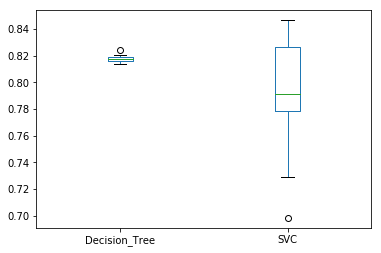

In [104]:
comparison.plot.box()

<font color='red'>**Comment:**</font> in the plot box the sides of the boxes represent the first and the third quartiles. The middle line is the mean, or the second quartile. The 'moustaches' are the minimum and maximum values that, in this case, the test_score takes.

**It's easy to understand that the decision tree has more constintent results than the svc. In fact, the decision tree is the most used classifing algorithm.**

### EXERCISE 18: Parameter Setting

We will setup a `GridSearchCV` (in `sklearn.model_selection`) which exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter passed in the constructor.

In particular, in the case of a pipeline, the parameters will have a hierarchical name composed by the name of the pipeline step followed by two underlines and then the name of 
specific parameter for that step. 

The parameters of the different steps of a pipeline can be accessed by means of the `pipeline.get_params()` method.

In particular, we will deal with the `max_depth` and `min_samples_split` parameters of the `DecisionTree`, but in principle it can be used with any number of parameters.

In particular, the `param_grid` has to be specified as a dictionary of the following form:

`
parameters = { 'decision_tree__max_depth': [2, 3, 4], 'decision_tree__min_samples_split': [0.05, 0.1, 0.2] }
`

The `GridSearchCV` object also takes the number of $k$-fold cross validation to be performed for each parameter setting in order to decide the best one, through the `cv` parameter. In general you can just provide an integer value, as in the previous exercise, but, in case of unbalanced classes, you might want to use a stratified sampling so that the folds will dub the distribution of the original dataset. In that case you can use, as a value for `cv` a `StratifiedKFold()` object with the number of folds you want to use.

The use of `GridSearchCV` is similar to the other `sklearn` objects: `.fit()` takes the training data and the target variable and the result of the search can be accessed as the `.cv_results_` attribute.

In order to inspect the outcome of the grid search, the results can be transformed into a pandas dataframe and sorted by the `rank_test_score` field as in the following:

`
pd.DataFrame(gs.cv_results_).sort_values(by="rank_test_score").head(5)
`

Moreover, the best parameter settings is available in the `.best_params_` field.

Finally, the best classifier is available in the `.best_estimator_` field, so it can be extracted and used for further analysis.

**Notice**: you can increase the number of values of the parameters, however keep in mind that since all the possible combinations of values are tested, this might give raise to a combinatorial explosion and the `GridSearchCV` could take very long to find the best setting.

In [105]:
parameters = { 'decision_tree__max_depth': [2, 3, 4, 10, 15], 'decision_tree__min_samples_split': [0.02, 0.05, 0.1, 0.2] }

<font color='red'>**Comment:**</font> parameters is a dictionary with a parameter space that *GridSearchCV* will use to optimize the setting of an estimator (i.g. a decision tree or *LinearSCV*). *GridSearchCV* exhaustively considers all parameter combinations and it generates candidates from a grid of parameter values (i.e. parameters). In this case only one grid is explored with parameters:

- *decision_tree_max_depth* ranging in [2, 3, 4, 10, 15].


-  *decision_tree__min_samples_split* ranging in [0.02, 0.05, 0.1, 0.2].

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

<font color='red'>**Comment:**</font> Stratified K-Folds cross-validator provides train/test indices to split data in train/test sets.

**Stratified means that every fold is a good representative of the whole set of data**. So it has to be heterogeneous. In this way, if we train our data on that fold, the model will be more accurate.

In the *cross-validation* our aim is to evaluate the model on a different subset of the main dataframe. So we can observe, for example, the test_score trend. **In exercise 16** we did it and we computed the 'mustaches' plot. **Now, using stratified folds, instead of only random ones, we can compare better the scores and determine the best values of the parameters to optimaze the construction of our model**.

Here below, we have *cv=StratifiedKFold(5)*. In conclusion, we desire splitting our dataframe in 5 folds, each of which is a representative of the whole of the data.

In [107]:
gs = GridSearchCV(pipeline, parameters, cv=StratifiedKFold(5))

<font color='red'>**Comment:**</font> gs is a GridSearchCV object, whose cross-validation splitting strategy is a *StratifiedKFolds object*. 

In [108]:
gs.fit(adultdf, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['Education'],
                                                                   OrdinalEncoder(categories=[['Preschool',
                                                                                               '1st-4th',
                                                                                               '5th-6th',
                                                                                               '7th-8th',
                                                                                               '9th',
                                         

<font color='red'>**Comment:**</font> by calling fit(adultdf,y) on the GridSearchCV class we are calculating the best settings to assign to our estimator (in this case, in pipeline refers to DecisionTreeClassifier).

In [109]:
pd.DataFrame(gs.cv_results_).sort_values(by="rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.360303,0.010218,0.025578,0.003191,10,0.02,"{'decision_tree__max_depth': 10, 'decision_tre...",0.850299,0.851044,0.857340,0.857033,0.856112,0.854366,0.003052,1
17,0.365830,0.010630,0.027164,0.001598,15,0.05,"{'decision_tree__max_depth': 15, 'decision_tre...",0.850760,0.851351,0.855037,0.858108,0.855651,0.854181,0.002758,2
13,0.336342,0.005862,0.025572,0.001951,10,0.05,"{'decision_tree__max_depth': 10, 'decision_tre...",0.849992,0.851351,0.855037,0.856880,0.855651,0.853782,0.002643,3
16,0.377907,0.003184,0.029544,0.001957,15,0.02,"{'decision_tree__max_depth': 15, 'decision_tre...",0.848303,0.848434,0.855498,0.858569,0.855958,0.853352,0.004202,4
14,0.323447,0.018473,0.024780,0.001592,10,0.1,"{'decision_tree__max_depth': 10, 'decision_tre...",0.838784,0.837684,0.842445,0.849201,0.845516,0.842726,0.004260,5


<font color='red'>**Comment:**</font> *cv_result_* is a dictionary with keys as column headers and values as columns, that can be imported into a pandas DataFrame. The dataframe is ordered by decreasing *rank_test_score*.

In [110]:
gs.best_params_

{'decision_tree__max_depth': 10, 'decision_tree__min_samples_split': 0.02}

<font color='red'>**Comment:**</font> parameter setting that give the best results, in term of the construction of the model, on the hold out data. 

Besides accuracy, the `GridSearchCV` can use also different performance metrics through the `scoring` parameter (possibly using the `make_scorer()` function if a custom metric is needed). For example, if **precision** is more important than accuracy (typically if true positives are more relevant than true negatives) you can equip `GridSearchCV`, for example, as in the following:

```
gs = GridSearchCV(pipeline, parameters, cv=StratifiedKFold(5), scoring='precision')
```

In [111]:
best_tree = gs.best_estimator_

<font color='red'>**Comment:**</font> obviously, we choose the decision tree that gives us the highest score value. It means that the classification, giving to it yet-seen data, will be accurate.

### EXERCISE 19: Plot the ROC Curve to Compare Two Classifier

The function `plot_roc()` accepts a variable number of classifiers and plot the ROC curve of all of them, so to allow to compare them.

Plot the ROC curve of the best `DecisionTree` classifier and compare it with the basic `LinearSVC` classifier.

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_roc(X, y, *classifiers, **kwargs):
    """
    This function will plot the Receiving Operating Characteristic
    for a number of classifiers.
    
    Parameters:
        X: the dataset to be used for fitting
        y: the target attribute
        classifiers: one or more classifiers
        names=classifier_names: a list of names for the classifiers
    """
    if len(classifiers) == 0:
        raise ValueError("You should provide at least a classifier")
    if 'names' in kwargs:
        if type(kwargs['names']) != list and type(kwargs['names']) != tuple:
            raise ValueError("Classifier names must either be a list or a tuple")
        if len(classifiers) > len(kwargs['names']):
            raise ValueError("Classifier names are provided but they are too few")
    # The train/test split should be the same for all the classifiers
    # so to compare them on a common ground
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    # iterates through classifiers
    for i, classifier in enumerate(classifiers):        
        classifier.fit(X_train, y_train) # train the model
        y_pred = classifier.predict(X_test) # predict the test data
        # compute false postive rate, and true positive rate
        if not hasattr(classifier, "predict_proba"):
            proba = classifier.decision_function(X_test)
        else:
            proba = classifier.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, proba)
        # calculate area under the curve to display on the plot
        auc = roc_auc_score(y_test, classifier.predict(X_test))
        # now, plot the computed values
        if 'names' in kwargs:
            name = kwargs['names'][i]
        else:
            name = i
        plt.plot(fpr, tpr, label='{} (area = {:0.2f})'.format(name, auc))

    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.025, 1.0])
    plt.ylim([-0.025, 1.025])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.legend(loc="best")
    plt.show()   # display

C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


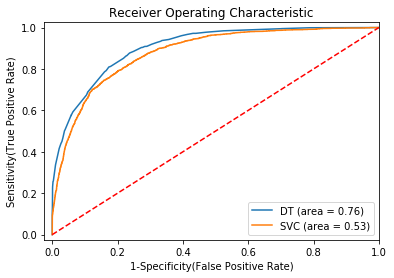

In [113]:
plot_roc(adultdf, y, best_tree, svc_pipeline, names=["DT", "SVC"])

<font color='red'>**Comment:**</font> the ROC curve is used to evaluate classifier output quality. Here, the top left corner of the plot is the 'ideal' point. NOT COMPLETE

When the classifier is not very stable (e.g., the LinearSVC), the ROC curve might differ from one call to the next, therefore take the results with the right degree of criticism and repeat the plots for a few times before making any hypotheses on which is better.

### EXERCISE 20: Confusion Matrix

The `confusion_matrix` in the `sklearn.metrics` package computes a confusion matrix that allows you to better open the classification black-box.

Also in this case you have to setup a train/test split in order to measure it on the test set and get the predicted values.

Once you have the confusion matrix `cm`, it could be nicely plot by means of a seaborn `sns.heatmap()` plot such as:

`
sns.heatmap(cm, annot=True, fmt="d")
`

<font color='red'>**Comment:**</font> In order to plot the `Confusion_matrix` we have to do the train/test with the best decision tree that gives us the highest score value.

In [114]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(adultdf, y, stratify=y)
best_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['Education'],
                                            OrdinalEncoder(categories=[['Preschool',
                                                                        '1st-4th',
                                                                        '5th-6th',
                                                                        '7th-8th',
                                                                        '9th',
                                                                        '10th',
                                                                        '11th',
                                                                        '12th',
                                                                        'HS-grad',
                                                                        'Prof-school',
   

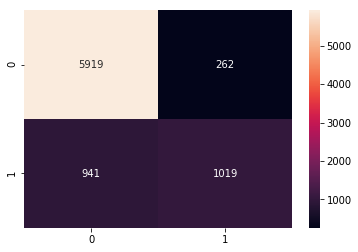

In [115]:
cm = confusion_matrix(y_test, best_tree.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

<font color='red'>**Comment:**</font> Plotting the `Confusion_matrix`we have the visualization of the performance of an algorithm.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct prediction.

### EXERCISE 21 - ENSEMBLE METHODS

As for the second homework, I ask you to complete the exercise 06-classification and extend it repeating the parameter setting of an ensemble learner of your choice (for example an `AdaBoostClassifier`, providing a `SVM` base estimator or a `RandomForest`) and compare the results with those of the basic classifiers.

<font color='red'>**Note:**</font> to do the parameter setting we follow the exercise 18 guide line. In order to make our flow of decisions clear we decide to divide our work in a ceratin amount of steps. Here below we portray them.

- **STEP 0**: Import the main classes and functions that will be useful for our analysis

- **STEP 1**: Pipeline creation. Our pipeline holds an encoding step, which is the same that we used in the previous exercises, and a step wherein we can fit our boosting classifier (AdaBoostClassifier) and bagging classifier (RandomForestClassifier).


- **STEP 2**: Defining parameters range of values coherently with the parameters which are accepted by the classes.


- **STEP 3**: Carry out GridSearch Eseguo il GridSearchCV


- **STEP 4**: Save GridSearchCV results in a dataframe, ordering it by rank test score.


- **STEP 5**: Use the best model of both AdaBoostCLassifier and RandomForest to classify our dataframe with the unique values in the Income column: >=50k or <=50k

- **STEP 6**: We calculate the accuracy of the model and, with it, the Confusion Matrix, which indicates how many rows/entities are classified correctly and how many not.


# `ADABOOSTCLASSIFIER`

**STEP 0**

In [116]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from numpy import ravel
from tqdm import tqdm 

**STEP 1**

In [117]:
abc_pipeline = Pipeline([
    ("preprocess", encoding),
    ("ada_classificator", AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10)))
])

<font color='red'>**Comment:**</font> pipeline creation is a very importat step. It gathers all the main function/classes in order to automate several operations. In fact, we are recycling the encoding pipeline which allows us to encode - as numbers - every column in adultdf dataframe. This let machine learning algorithms to wok properly. This step is the **"preprocess"**. Then, in **"ada_classificator"** we put in the AdaBoostClassifier through which we'll collect predictions.

**NB:** we decide to use decision trees as weak classifier in the algorithm. Moreover, we make **maximum depth** of every tree equal to 10, which will result in an increase of computing time. This because previously we found out that the best depth for our decision tree and our data is 10.

**STEP 2**

**A little note from exercise 15:**

"*We will setup a **GridSearchCV** (in sklearn.model_selection) which exhaustively generates candidates from a grid of parameter values specified with the **param_grid** parameter passed in the constructor.*"

"*In particular, in the case of a pipeline, **the parameters will have a hierarchical name composed by the name of the pipeline step followed by two underlines and then the name of specific parameter for that step**.*"

**For example:**
parameters = { 'decision_tree__max_depth': [2, 3, 4, 10, 15], 'decision_tree__min_samples_split': [0.02, 0.05, 0.1, 0.2] }

In [119]:
param_grid_ADA = {"ada_classificator__n_estimators": [50, 75, 100, 150]}

"ada_classificator__base_estimator__criterion" : ["gini", "entropy"],
              "ada_classificator__base_estimator__splitter" :   ["best", "random"],

<font color='red'>**Comment:**</font> we decide to vary only the **n_estimators** parameter of AdaBoostClassificator because of the algorithm computing time. It may be obvious that the more number of decision trees we use, the more AdaBoost will be accurate. According to the final "mustaches" plot, the interesting thing is that the accuracy score doesn't change linearly with the growth of trees used.

We would like to see the trend even changing parameters of the **base_estimator**. However, the problem is always the computing time. We report the changing parameters and their range of settings in the case we would have done this further analysis:

- "ada_classificator__base_estimator__criterion" : ["gini", "entropy"],
          
- "ada_classificator__base_estimator__splitter" :   ["best", "random"],
              
**NB:** they should be added in **param_grid**

**STEP 3**

In [120]:
gs_ADA = GridSearchCV(abc_pipeline, param_grid_ADA , cv=StratifiedKFold(5))

In [121]:
gs_ADA.fit(adultdf, ravel(y))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['Education'],
                                                                   OrdinalEncoder(categories=[['Preschool',
                                                                                               '1st-4th',
                                                                                               '5th-6th',
                                                                                               '7th-8th',
                                                                                               '9th',
                                         

<font color='red'>**Comment:**</font> As third step we have execute `GridSearchCV`.

By calling *fit(adultdf,revel(y))* on the **GridSearchCV** object **gs_ADA** we are calculating the best settings to assign to our estimator. We use even *ravel()* function to convert y in a numpy 1-D array.


**STEP 4**


In [122]:
ada_df = pd.DataFrame(gs_ADA.cv_results_).sort_values(by="rank_test_score").head(5)

In [123]:
ada_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ada_classificator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,46.124761,1.660918,0.543931,0.010869,150,{'ada_classificator__n_estimators': 150},0.829265,0.828010,0.827396,0.834613,0.831695,0.830196,0.002655,1
1,27.370030,1.670843,0.315598,0.050361,75,{'ada_classificator__n_estimators': 75},0.829418,0.824631,0.834613,0.828163,0.831081,0.829581,0.003290,2
2,34.976202,2.485373,0.403439,0.034647,100,{'ada_classificator__n_estimators': 100},0.830032,0.823096,0.826474,0.831849,0.833231,0.828936,0.003696,3
0,18.895990,2.443450,0.209325,0.022541,50,{'ada_classificator__n_estimators': 50},0.823891,0.828778,0.824478,0.825860,0.832463,0.827094,0.003171,4


<font color='red'>**Comment:**</font> as expected, the best test belong to the model with the most number of trees used. It turns out to be the model that we'll use to predict.

In [124]:
best_ADA = gs_ADA.best_estimator_
best_ADA

Pipeline(memory=None,
         steps=[('preprocess',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['Education'],
                                            OrdinalEncoder(categories=[['Preschool',
                                                                        '1st-4th',
                                                                        '5th-6th',
                                                                        '7th-8th',
                                                                        '9th',
                                                                        '10th',
                                                                        '11th',
                                                                        '12th',
                                                                        'HS-grad',
                                                                        'Prof-school',
   

In [125]:
gs_ADA.best_params_

{'ada_classificator__n_estimators': 150}

<font color='red'>**Comment:**</font> **best_params** gives us the best parameter setting in order to have the best results in term of the construction of the model.**best_estimator_** turns out to be an **AdaBoostClassifier** with the best parameters setting according to the ones we had **GridSearchCV** analyzed.

**STEP 5**

In [167]:
x_tr , x_tst, y_tr , y_tst = train_test_split(adultdf, y)

<font color='red'>**NB:**</font> this splitting is used even in **RandomForest**

In [180]:
best_ADA.fit(x_tr,ravel(y_tr))
y_pred_ADA = best_ADA.predict(x_tst)
accuracy_score(y_pred_ADA, y_tst)

0.8368750767718953

<font color='red'>**Comment:**</font> We decide to split our data in order to verify the real accuracy of our model, so there is **less overfitting impact**.

**STEP 6**

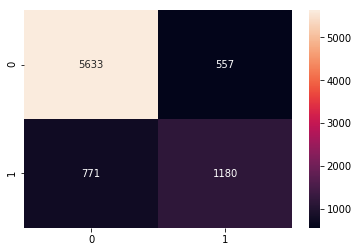

In [182]:
cm = confusion_matrix(y_tst, best_ADA.predict(x_tst))
sns.heatmap(cm, annot=True, fmt="d")

<font color='red'>**Comment:**</font> Plotting the `Confusion_matrix`we have the visualization of the performance of an algorithm.
According to the diagram, the model fit not so good to the data. In fact, 1181 entities belong to the right class instead of 771 that were classified wrong. But 771 is a high percentage of 1180.

# `RANDOM FOREST`

**STEP 1**

In [183]:
RF_pipeline = Pipeline([
    ("preprocess", encoding),
    ("RF_classificator", RandomForestClassifier())
])

<font color='red'>**Comment:**</font> As for AdaBoost, we create a pipeline. The first pipeline step is preprocess, whose object is encoding, a pipeline object that turns categorical items to numerical and binary ones.
The second step il the application of the **Random Forest Classifier**. It creates a number of decision trees and the final classification is based on bagging. So, for every item the algorithm chooses the class that gathers more votes by the decision trees.

**STEP 2**

In [184]:
param_grid_RF = {"RF_classificator__n_estimators": [50, 100, 150],
                 "RF_classificator__criterion": ["gini", "entropy"]}

<font color='red'>**Comment:**</font> we want GridSearchCV to work and to calculate combinations with these parameters. Others could be added, but the computational time unfortunately is not on our side. Moreover, we think that they are the most representative parameters.

**STEP 3**

In [185]:
gs_RF = GridSearchCV(RF_pipeline, param_grid_RF)

<font color='red'>**Comment:**</font> gs_RF is a GridSearchCV object. 

In [186]:
gs_RF.fit(adultdf, ravel(y))

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['Education'],
                                                                   OrdinalEncoder(categories=[['Preschool',
                                                                                               '1st-4th',
                                                                                               '5th-6th',
                                                                                               '7th-8th',
                                                                                               '9th',
                                                                                               '10th',
        

**STEP 4**

In [187]:
RF_df = pd.DataFrame(gs_RF.cv_results_).sort_values(by="rank_test_score").head(5)

In [188]:
RF_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF_classificator__criterion,param_RF_classificator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,6.237145,0.276200,0.313891,0.090823,entropy,150,"{'RF_classificator__criterion': 'entropy', 'RF...",0.850914,0.845055,0.845362,0.852580,0.849201,0.848623,0.002987,1
2,5.688082,0.214030,0.269721,0.007546,gini,150,"{'RF_classificator__criterion': 'gini', 'RF_cl...",0.849225,0.840909,0.846898,0.851351,0.852887,0.848254,0.004190,2
4,4.204828,0.369393,0.183526,0.007659,entropy,100,"{'RF_classificator__criterion': 'entropy', 'RF...",0.850914,0.842752,0.844287,0.852426,0.850737,0.848223,0.003915,3
1,3.995114,0.191935,0.203105,0.014990,gini,100,"{'RF_classificator__criterion': 'gini', 'RF_cl...",0.851374,0.840909,0.845362,0.851351,0.852119,0.848223,0.004395,4
3,2.004504,0.085296,0.105496,0.005309,entropy,50,"{'RF_classificator__criterion': 'entropy', 'RF...",0.849532,0.844134,0.845209,0.851198,0.850276,0.848070,0.002845,5


<font color='red'>**Comment:**</font> As we did before with **AdaBoostClassifier**, we use **GridSearchCV** and then we save results in a dataframe, *RF_df*. The dataframe is ordered by decreasing *rank_test_score*. From our analysis we end up that **the best model is the one that applies the Gini criterion for the creation of 100 decision trees**.

Below, we'll use the best model to classify our data and then we'll calculate its accuracy score. We'll use it to compare all the alghoritms used in this homework.

In [189]:
best_RF = gs_RF.best_estimator_
best_RF

Pipeline(memory=None,
         steps=[('preprocess',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[(['Education'],
                                            OrdinalEncoder(categories=[['Preschool',
                                                                        '1st-4th',
                                                                        '5th-6th',
                                                                        '7th-8th',
                                                                        '9th',
                                                                        '10th',
                                                                        '11th',
                                                                        '12th',
                                                                        'HS-grad',
                                                                        'Prof-school',
   

In [190]:
gs_RF.best_params_

{'RF_classificator__criterion': 'entropy',
 'RF_classificator__n_estimators': 150}

**STEP 5**

<font color='red'>**Note:**</font> in the fifth step of the previous AdaBoost analysis we splitted the data as:
***x_tr , x_tst, y_tr , y_tst = train_test_split(adultdf, y)***.


In [192]:
best_RF.fit(x_tr, ravel(y_tr))
y_pred_RF = best_RF.predict(x_tst)
accuracy_score(y_pred_RF, y_tst)

0.8503869303525365

<font color='red'>**Comment:**</font> we can conclude that the **RandomForest** accuracy score is better than **AdaBoost's**. Even in this case we prevent the model to suffer of **overfitting problems** thanks to the splitting.

**STEP 6**

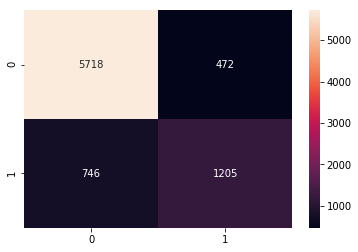

In [194]:
cm = confusion_matrix(y_tst, best_RF.predict(x_tst))
sns.heatmap(cm, annot=True, fmt="d")

<font color='red'>**Comment:**</font> it is clear that RandomForest classifies better than AdaBoost. But, even though 472 is a little percentage of 5718, 746 is much more of 1205. We can adfirm that the model tends to classify better one class than the other.

# CROSS-VALIDATION FOR ADABOOST AND RANDOM FOREST

In [196]:
results_ADA = cross_validate(best_ADA, adultdf, ravel(y), cv=10, return_train_score=False)
results_ADA

{'fit_time': array([50.66377687, 58.84900975, 65.18025208, 49.5527668 , 46.61641836,
        48.49054122, 46.7889328 , 48.68041849, 49.07688475, 48.85566473]),
 'score_time': array([0.28758454, 0.31243086, 0.2716713 , 0.26763964, 0.26365042,
        0.25325418, 0.2636807 , 0.26767755, 0.26364756, 0.26764274]),
 'test_score': array([0.82161498, 0.83169533, 0.8264742 , 0.8227887 , 0.83845209,
        0.82432432, 0.8277027 , 0.83660934, 0.83445946, 0.8203317 ])}

## SICCOME QUELLO SOPRA CI METTE UN?ETERNITA A COMPILARE; COPIO E INCOLLO IL DIZIONARIO DI RISULTATO; COSì SE SERVE c'è.

```
{'fit_time': array([113.22796726, 102.66276836, 100.05355763, 101.58360887,
        147.74507594, 148.12574983, 119.4747889 , 109.37364888,
        106.59026051, 131.06822157]),
 'score_time': array([0.75975823, 1.02267432, 1.00367928, 0.92869782, 1.78242803,
        1.2766006 , 1.15463257, 1.0736599 , 0.95369029, 0.96470118]),
 'test_score': array([0.82130795, 0.83138821, 0.83814496, 0.82954545, 0.83783784,
        0.82678133, 0.83077396, 0.82739558, 0.84766585, 0.82739558])}
```

In [197]:
results_RF = cross_validate(best_RF, adultdf, ravel(y), cv=10, return_train_score=False)
results_RF

{'fit_time': array([6.51775002, 6.75803757, 6.49839497, 6.65108919, 6.98682523,
        7.02494144, 6.65368462, 6.41450691, 6.80803704, 6.41543841]),
 'score_time': array([0.13981533, 0.13981247, 0.13981509, 0.15621901, 0.14117861,
        0.14059043, 0.13981509, 0.14381075, 0.14384675, 0.13985014]),
 'test_score': array([0.83850169, 0.85165848, 0.84981572, 0.83937346, 0.8544226 ,
        0.83783784, 0.85227273, 0.85350123, 0.85749386, 0.84398034])}

In [198]:
final_comparison = pd.DataFrame({ 'Decision_Tree': results['test_score'], 'SVC': svc_results['test_score'],
                                 'AdaBoostQualifier': results_ADA['test_score'], 'Random_Forest': results_RF['test_score'] })

In [199]:
final_comparison

,Decision_Tree,SVC,AdaBoostQualifier,Random_Forest
0,0.815781,0.781394,0.821615,0.838502
1,0.820332,0.831388,0.831695,0.851658
2,0.816953,0.786855,0.826474,0.849816
3,0.814803,0.811425,0.822789,0.839373
4,0.819410,0.729423,0.838452,0.854423
5,0.816646,0.698403,0.824324,0.837838
6,0.813882,0.796069,0.827703,0.852273
7,0.824324,0.846437,0.836609,0.853501
8,0.818182,0.839066,0.834459,0.857494
9,0.817875,0.777641,0.820332,0.843980


<font color='red'>**Comment:**</font> As final conclusions we have compared the various performances for each classification algorithm so that we can compare them at the best.

In [200]:
final_comparison.describe()

,Decision_Tree,SVC,AdaBoostQualifier,Random_Forest
count,10.000000,10.000000,10.000000,10.000000
mean,0.817819,0.789810,0.828445,0.847886
std,0.003022,0.047255,0.006493,0.007307
min,0.813882,0.698403,0.820332,0.837838
25%,0.815998,0.778579,0.823173,0.840525
50%,0.817414,0.791462,0.827088,0.850737
75%,0.819103,0.826397,0.833768,0.853194
max,0.824324,0.846437,0.838452,0.857494


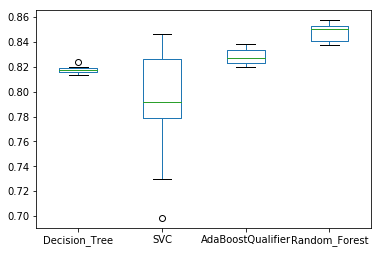

In [201]:
final_comparison.plot.box()

# CONCLUSION:

The conclusion of our analysis is the comparison between the various classification algorithms. We notice that the best choice that fit our data is the **Random Forest** algorithm. 
We can see in the plot above how the average of **Random Forest**, which is rappresented by the green line, is better than the others'.

{In the plot box the sides of the boxes represent the first and the third quartiles. The middle line is the mean, or the second quartile. The 'moustaches' are the minimum and maximum values that, in this case, the test_score takes. 
(HO GIA' DESCRITTO IL GRAFICO A BAFFI NEGLI ESERCIZI PRECEDENTI NON SERVE FARLO ANCHE QUA)}

We can conclude that **DecisionTree** and **LinearSVC** aren't as precise as RandomForest and AdaBoost. The reason is that the second two are more "agglomerative". In fact, they use several weak classifier - in our case they are decision tree - instead only one. This is their strong point: the variance of correct classification could be heavily reduced with the variability aggregation.

We would emphazise that **AdaBoost** is a boosting meta-algorithm. Each weak classificator affects on the final voting with a certain weight. This weight will be computed on the accuracy of every model. The more there is an error, the more the weight of the weak classificator will grow.

On the other hand, **RandomForest** is a begging alghoritm. It is structured with a number of weak classificator. The final classification will be the mean of all the decision trees - the weak classificators. So, in this case, there isn't a weighted mean.

In the end we report the mean accuracy score of all the algorithms:


Algorithm | Mean | Max 
---------|------|------
Decision_Tree|	0.817819|0.824324
LinearSVC|0.789810|0.846437
AdaBoostQualifier|0.828445|0.838452
Random_Forest|0.847886|0.857494